In [ ]:
#!wget https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0 -O example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv

--2023-10-01 23:21:02--  https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv [following]
--2023-10-01 23:21:02--  https://www.dropbox.com/s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7ad22430da5d870340eae2be9.dl.dropboxusercontent.com/cd/0/inline/CEycFEYqoEUefn3W6cMaiL43xJGeBzHZhOHzI6LiC4murlIZ6HQYSt9PLlGVlSR2bP9pg1ISul2NZm1-8_vOfF1SfzWgw7JK_zyeLewD_v5ZFrPWnqiWtKtPN0R_rV5Upw0/file# [following]
--2023-10-01 23:21:02--  https://uce7ad22430da5

In [ ]:
# Importando librerías y datos
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('/content/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv',sep=" ",usecols=['fPhot','fArrivalTime'])#,dtype={'fId':str}

In [ ]:
print(len(df))

9965440


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="Greens")

,fPhot,fArrivalTime
fPhot,1.000000,0.027845
fArrivalTime,0.027845,1.000000


In [ ]:
# Definir un umbral
umbral = 25

# Crear una nueva columna llamada 'label' basada en la columna 'fPhot'
df['label'] = np.where(df['fPhot'] <= umbral, 'ruido', 'no_ruido')

# Seleccionar solo las columnas 'fArrivalTime' y 'fPhot' para usar en K-means
X = df[['fArrivalTime', 'fPhot']].values

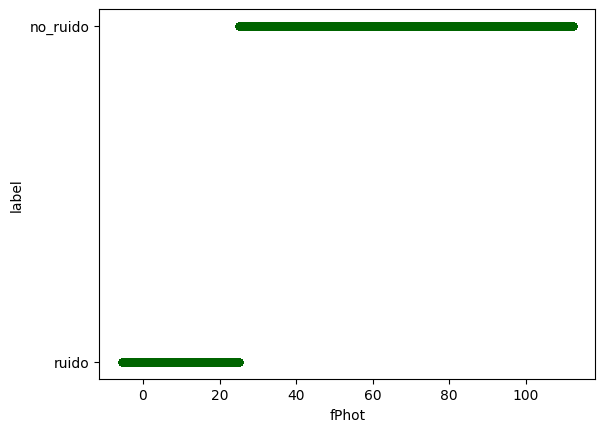

In [ ]:
df.plot.scatter(x='fPhot', y='label', c='DarkGreen')
plt.show()

In [ ]:
df

In [ ]:
X

array([[164.99    ,  -0.861328],
       [131.935   ,  -1.75391 ],
       [136.663   ,  -1.53125 ],
       ...,
       [ -1.      ,   0.      ],
       [ -1.      ,   0.      ],
       [ -1.      ,   0.      ]])

In [ ]:
n_clusters = 3

# Crear una instancia del modelo K-means
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a tus datos
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obtener las etiquetas de cluster para cada punto de datos
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

In [ ]:
labels

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

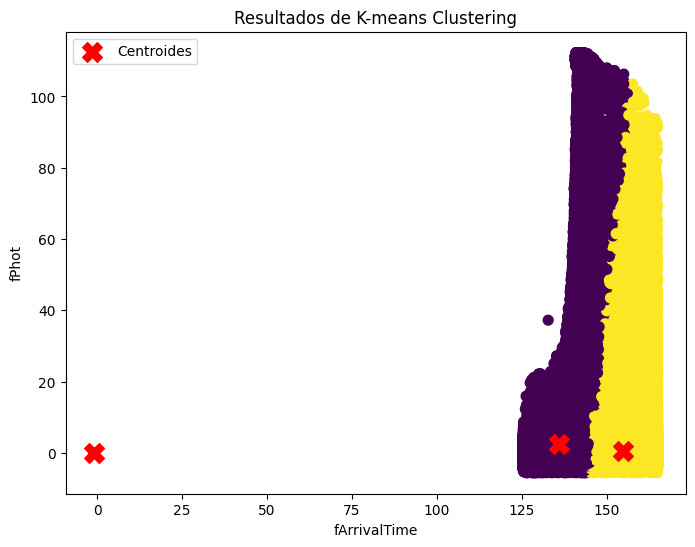

In [ ]:
# Crear una figura
plt.figure(figsize=(8, 6))

# Representar los puntos de datos de acuerdo a las etiquetas
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Representar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroides')

# Configurar etiquetas de los ejes
plt.xlabel('fArrivalTime')
plt.ylabel('fPhot')

# Configurar leyenda
plt.legend()

# Mostrar el gráfico
plt.title('Resultados de K-means Clustering')
plt.show()

In [ ]:
suma_ruido = ruido.groupby('label').count()
suma_señal = señal.groupby('label').count()
comprobacion_1 = suma_ruido['fPhot'].sum() + suma_señal['fPhot'].sum()

# Suma de filas por label
print("Conteo de filas con fPhot <= 25 por etiqueta: {}".format(suma_ruido['fPhot'].sum()))

print("\nConteo de filas con fPhot > 25 por etiqueta: {}".format(suma_señal['fPhot'].sum()))

# Comprobar
print("\nComprobación: {}".format(comprobacion_1))

Conteo de filas con fPhot <= 25 por etiqueta: 9650896

Conteo de filas con fPhot > 25 por etiqueta: 173020

Comprobación: 9823916


In [ ]:
suma_labels_ruido = X[X['label'].isin(labels_ruido)].label.value_counts().sum()
suma_labels_señal = X[X['label'].isin(labels_señal)].label.value_counts().sum()
comprobacion_2 = suma_labels_ruido + suma_labels_señal

# Suma de filas por label
print("Conteo de filas con fPhot <= 25 por etiqueta: {}".format(suma_labels_ruido))

print("\nConteo de filas con fPhot > 25 por etiqueta: {}".format(suma_labels_señal))

# Comprobar
print("\nComprobación: {}".format(comprobacion_2))

Conteo de filas con fPhot <= 25 por etiqueta: 9644797

Conteo de filas con fPhot > 25 por etiqueta: 320643

Comprobación: 9965440
